# Übungsaufgaben

## Lineare Regression

Der Datensatz "inffb.dat" enthält Daten zu Informatik-Fachbereichen an Universitäten, darunter z.B. Note, Dozentenverhalten, Ausstattung...

Lesen Sie den Datensatz ein und verschaffen sich eine Übersicht über die Struktur.

In [58]:
inf <- read.table("data/inffb.dat", na.strings=".", header=T)
str(inf)

'data.frame':	39 obs. of  8 variables:
 $ NOTE    : num  1.73 1.87 1.91 1.94 2.02 2.06 2.06 2.09 2.1 2.12 ...
 $ DOZENT  : num  2 1.8 2 2 2 2.3 2.2 2.1 2.3 2.2 ...
 $ VOLL    : num  1.6 1.7 1.3 1.5 1.4 1.4 1.5 1.4 1.5 1.5 ...
 $ INHALT  : num  1.9 2.3 2.5 2.3 2.5 2.3 2.4 2.8 2.4 2.7 ...
 $ AUSSTAT : num  1.7 1.8 1.9 2 2.2 2.2 2.1 2.2 2.2 2.2 ...
 $ DAUER   : num  10.5 11.5 11.2 12.9 11.8 10.9 13.7 11.8 14.5 NA ...
 $ STUDPROF: int  16 26 14 NA 21 35 19 NA 26 9 ...
 $ WANDER  : int  -43 -35 -57 NA -58 -53 -44 -61 -53 NA ...


Eliminieren Sie die Missing Values.

In [59]:
inf <- na.omit(inf)
str(inf)

'data.frame':	32 obs. of  8 variables:
 $ NOTE    : num  1.73 1.87 1.91 2.02 2.06 2.06 2.1 2.14 2.15 2.19 ...
 $ DOZENT  : num  2 1.8 2 2 2.3 2.2 2.3 2.5 2.3 2.2 ...
 $ VOLL    : num  1.6 1.7 1.3 1.4 1.4 1.5 1.5 1.5 1.7 1.7 ...
 $ INHALT  : num  1.9 2.3 2.5 2.5 2.3 2.4 2.4 2.5 2.7 2.8 ...
 $ AUSSTAT : num  1.7 1.8 1.9 2.2 2.2 2.1 2.2 2.1 2 2.2 ...
 $ DAUER   : num  10.5 11.5 11.2 11.8 10.9 13.7 14.5 10.5 13.9 12.5 ...
 $ STUDPROF: int  16 26 14 21 35 19 26 22 36 22 ...
 $ WANDER  : int  -43 -35 -57 -58 -53 -44 -53 -18 -14 -12 ...
 - attr(*, "na.action")=Class 'omit'  Named int [1:7] 4 8 10 14 28 36 39
  .. ..- attr(*, "names")= chr [1:7] "4" "8" "10" "14" ...


Ermitteln Sie die Regressionskoeffizienten und treffen eine Aussage bzgl. der Einflussrichtung.

In [60]:
attach(inf)
regcof <- lm(NOTE~AUSSTAT)
regcof

The following objects are masked from inf (pos = 3):

    AUSSTAT, DAUER, DOZENT, INHALT, NOTE, STUDPROF, VOLL, WANDER

The following objects are masked from dat2 (pos = 4):

    AUSSTAT, DAUER, DOZENT, INHALT, NOTE, STUDPROF, VOLL, WANDER

The following objects are masked from dat2 (pos = 5):

    AUSSTAT, DAUER, DOZENT, INHALT, NOTE, STUDPROF, VOLL, WANDER




Call:
lm(formula = NOTE ~ AUSSTAT)

Coefficients:
(Intercept)      AUSSTAT  
     0.4867       0.7733  


Die Ausstattung hat einen positiven Einfluss auf die Note.

Beurteilen Sie die Signifikanz der Regressionskoeffizienten zu einem Signifikanzniveau von 5%.
Wie beurteilen Sie das Bestimmtheitsmaß?


In [61]:
summary(regcof)


Call:
lm(formula = NOTE ~ AUSSTAT)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.18648 -0.08334 -0.01985  0.11530  0.20480 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.48669    0.14928    3.26  0.00277 ** 
AUSSTAT      0.77327    0.06122   12.63 1.53e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.123 on 30 degrees of freedom
Multiple R-squared:  0.8417,	Adjusted R-squared:  0.8365 
F-statistic: 159.5 on 1 and 30 DF,  p-value: 1.534e-13


p < 0,05, d.h. der Regressionskoeffizient ist statistisch signifikant.
$R^2$ = 0,8417. Das ist ein solider Wert, knapp 85% der Varianz sind durch das Modell erklärbar.

Zeichnen Sie ein Scatterplot mit der ermittelten Regressionsgerade.

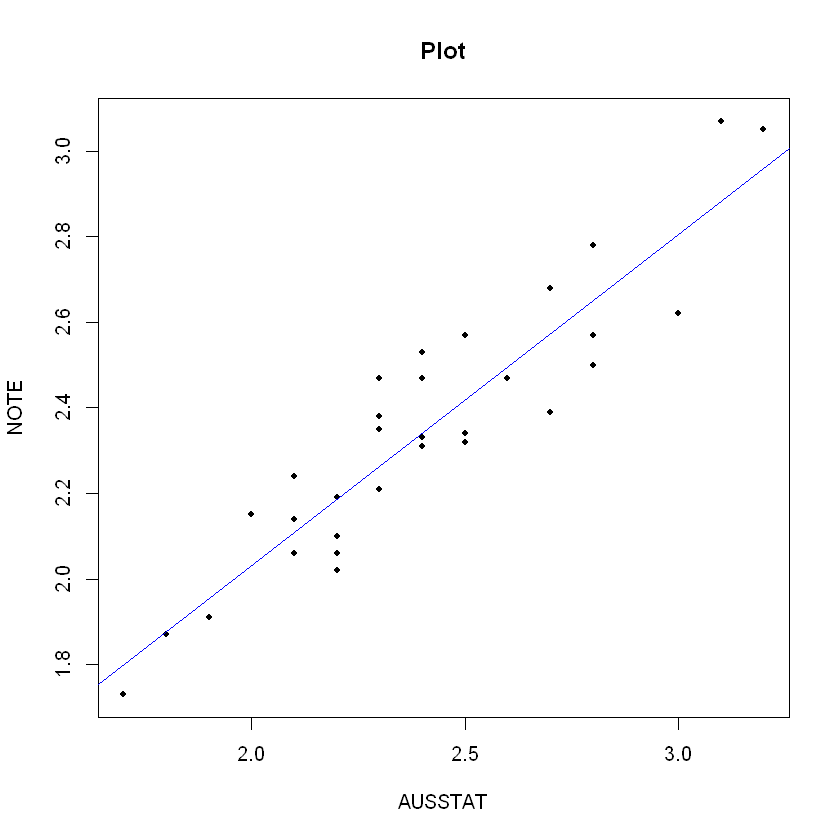

In [62]:
plot(AUSSTAT, NOTE, pch=20, main="Plot")
abline(regcof, col="BLUE")

Ermitteln Sie das Konfidenz- und Prognoseintervall und integrieren Sie es in das Plot. Treffen Sie eine Vorhersage für die Noten bei AUSSTAT = 1.8, 4.0, 3.2.

Warning message in predict.lm(regcof, interval = "prediction"):
"predictions on current data refer to _future_ responses
"

1        2        3 
1.878563 3.579746 2.961134

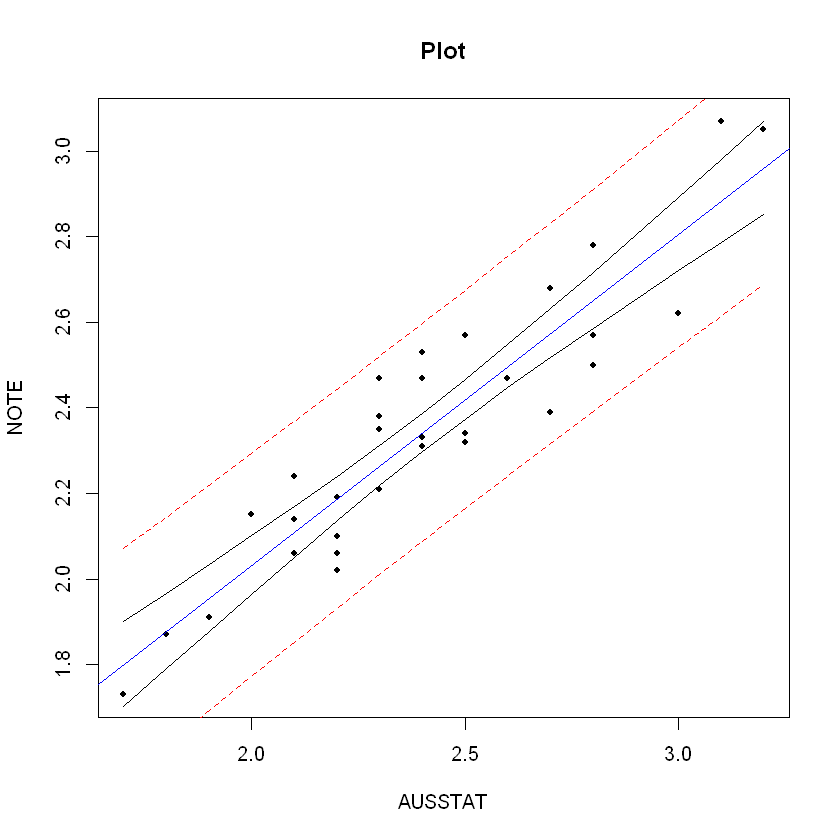

In [63]:
plot(AUSSTAT,NOTE, pch=20, main = "Plot")
abline(regcof, col ='BLUE')
p <- predict.lm(regcof, interval = "confidence") # Konfidenzintervall 
o <- order(AUSSTAT)
lines(AUSSTAT[o],p[o,2])
lines(AUSSTAT[o],p[o,3])
p <- predict.lm(regcof, interval = "prediction") # Prognoseintervall
lines(AUSSTAT[o],p[o,2], col = "RED", lty = 2) # lty=2 macht eine gestrichelte Linie
lines(AUSSTAT[o],p[o,3], col = "RED", lty = 2)
predict.lm(regcof, newdata=data.frame(AUSSTAT=c(1.8, 4.0, 3.2))) # , interval = "confidence")

Führen Sie eine Residuenanalyse durch und interpretieren das Ergebnis.

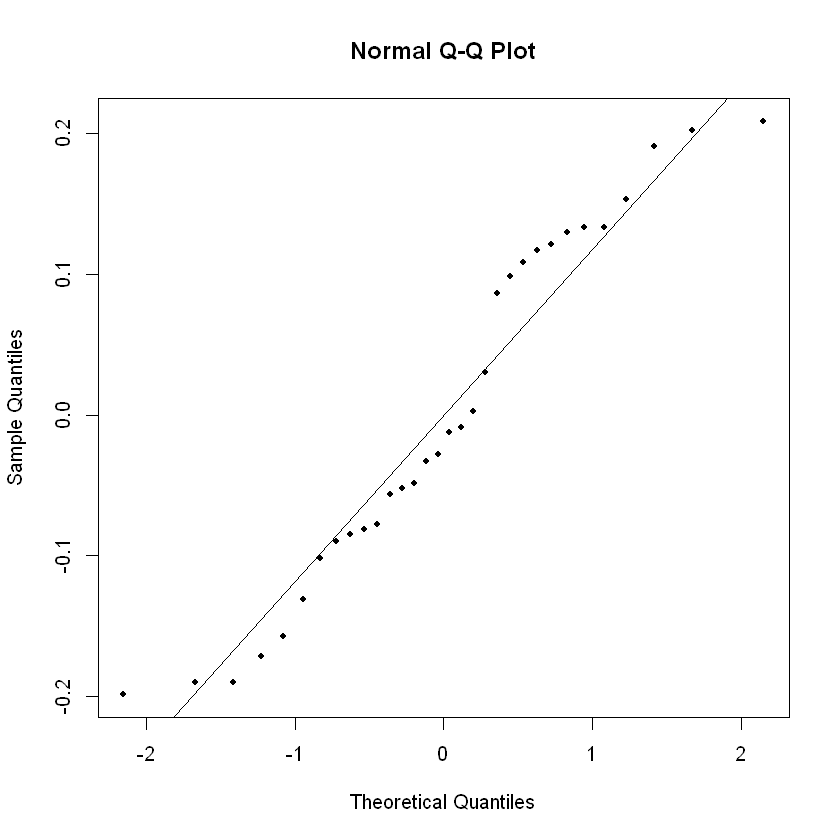

In [64]:
m <- model.matrix(regcof)
im <- solve(t(m)%*%m)
H <- m%*%im%*%t(m)
s2res <- 1-diag(H)
e <- sort(regcof$residuals/sqrt(s2res))
qqnorm(e, pch=20)
abline(mean(e[-c(1,length(e))]), sd(e[-c(1,length(e))]))

Keine starken Aussreißer, das Modell ist gut.

## Logistische Regression


Lesen Sie den Datensatz "lohn.dat" ein. Verschaffen Sie sich einen Überblick über den Datensatz.
Ermitteln Sie, ob Lohn, Alter und Geschlecht (0=w, 1=m) einen Einfluss auf die Chance haben, Mitglied in einer Gewerkschaft(0=nein, 1=ja) zu sein.
Stellen Sie das Logit-Modell auf.
Interpretieren Sie das Ergebnis.

In [65]:
dat <- read.table("data/lohn.dat", header=T)
str(dat)

'data.frame':	534 obs. of  11 variables:
 $ Ausbildung   : int  8 9 12 12 12 13 10 12 16 12 ...
 $ Süd          : int  0 0 0 0 0 0 1 0 0 0 ...
 $ Geschlecht   : int  1 1 0 0 0 0 0 0 0 0 ...
 $ Erfahrung    : int  21 42 1 4 17 9 27 9 11 9 ...
 $ Gewerkschaft : int  0 0 0 0 0 1 0 0 0 0 ...
 $ Lohn         : num  5.1 4.95 6.67 4 7.5 ...
 $ Alter        : int  35 57 19 22 35 28 43 27 33 27 ...
 $ Rasse        : int  2 3 3 3 3 3 3 3 3 3 ...
 $ Beschäftigung: int  6 6 6 6 6 6 6 6 6 6 ...
 $ Sektor       : int  1 1 1 0 0 0 0 0 1 0 ...
 $ Status       : int  1 1 0 0 1 0 0 0 1 0 ...


In [66]:
logit <- glm(Gewerkschaft ~ Lohn + Alter + Geschlecht, family = binomial, data=dat)
summary(logit)


Call:
glm(formula = Gewerkschaft ~ Lohn + Alter + Geschlecht, family = binomial, 
    data = dat)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2167  -0.6663  -0.5288  -0.3878   2.2766  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.666635   0.434581  -6.136 8.46e-10 ***
Lohn         0.051156   0.020826   2.456  0.01404 *  
Alter        0.025702   0.009894   2.598  0.00938 ** 
Geschlecht  -0.822069   0.252882  -3.251  0.00115 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 503.08  on 533  degrees of freedom
Residual deviance: 474.34  on 530  degrees of freedom
AIC: 482.34

Number of Fisher Scoring iterations: 4


Alle 3 Regressionskoeffizienten sind statistisch signifikant.
Eine Erhöhung um eine Einheit Lohn erhöht die Chance Mitglied in einer Gewerktschaft zu sein um 0,05.
Eine Erhöhung des Alters um eine Einheit erhöht die Chance Mitglied in einer Gewerktschaft zu sein um 0,03.
Das männliche Geschlecht verringert die Chance Mitglied in einer Gewerkschaft zu sein um 0,8.

Überprüfen und interpretieren Sie das Bestimmtheitsmaß.

In [67]:
library(pscl)
pR2(logit)

llh       llhNull            G2      McFadden          r2ML 
-237.16786451 -251.54206888   28.74840873    0.05714434    0.05241247 
         r2CU 
   0.08589483

Sehr niedrig, Modell ist nicht adäquat.

Überprüfen Sie, ob der Lohn einen Einfluss auf das Geschlecht hat.

In [68]:
logit <- glm(Geschlecht ~ Lohn, family=binomial, data=dat)
summary(logit)


Call:
glm(formula = Geschlecht ~ Lohn, family = binomial, data = dat)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4165  -1.1203  -0.7409   1.1483   2.6245  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.63748    0.19130   3.332 0.000861 ***
Lohn        -0.09099    0.01978  -4.599 4.24e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 736.65  on 533  degrees of freedom
Residual deviance: 712.50  on 532  degrees of freedom
AIC: 716.5

Number of Fisher Scoring iterations: 4


Regressionskoeffizient ist statistisch signifikant.
Eine Erhöhung des Lohns um eine Einheit verringert die Chance männlich zu sein um 0,09.

Erstellen Sie einen Datensatz lohn.Modell, der Daten von 5-10 in 0,15 Schritten enthält.

In [69]:
l.min = 5  # Grad Fahrenheit 
l.max = 10  # Grad Fahrenheit
# Temperaturfolge von T.min bis T.max bilden:
lohn.X <- seq(l.min, l.max, by=0.15)
# Dataframe für das Modell bilden:
lohn.Modell <- data.frame(Lohn = lohn.X)
head(lohn.Modell) # Die ersten Einträge des Datensatzes

Lohn
5.00
5.15
5.30
5.45
5.60
5.75


Treffen Sie anhand des Datensatzes eine Aussage über die Chance, männlich zu sein.

In [70]:
p <- predict(logit, lohn.Modell, type = "response")
p

1         2         3         4         5         6         7         8 
0.5455092 0.5421234 0.5387337 0.5353404 0.5319439 0.5285444 0.5251422 0.5217377 
        9        10        11        12        13        14        15        16 
0.5183312 0.5149230 0.5115134 0.5081028 0.5046913 0.5012795 0.4978675 0.4944557 
       17        18        19        20        21        22        23        24 
0.4910444 0.4876340 0.4842247 0.4808169 0.4774108 0.4740069 0.4706054 0.4672066 
       25        26        27        28        29        30        31        32 
0.4638108 0.4604185 0.4570297 0.4536450 0.4502645 0.4468886 0.4435176 0.4401518 
       33        34 
0.4367914 0.4334369